# Heart Disease UCI

Neste projeto estaremos trabalhando com o conjunto de dados do Kaggle (HEART DISEASE ANALYSIS). Temos dados que classificam se os pacientes têm doenças cardíacas ou não, de acordo com suas características. Vamos tentar usar esses dados para criar um modelo que tente prever se um paciente tem essa doença ou não

# Dataset Columns (Features)

   * Age (age in years)
   * Sex (1 = male; 0 = female)
   * CP (chest pain type)
   * TRESTBPS (resting blood pressure (in mm Hg on admission to the hospital))
   * CHOL (serum cholestoral in mg/dl)
   * FPS (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
   * RESTECH (resting electrocardiographic results)
   * THALACH (maximum heart rate achieved)
   * EXANG (exercise induced angina (1 = yes; 0 = no))
   * OLDPEAK (ST depression induced by exercise relative to rest)
   * SLOPE (the slope of the peak exercise ST segment)
   * CA (number of major vessels (0-3) colored by flourosopy)
   * THAL (3 = normal; 6 = fixed defect; 7 = reversable defect)
   * TARGET (1 or 0)

# importando bibliotecas e lendo o arquivo.

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['heart.csv']


In [6]:
df = pd.read_csv("../input/heart.csv")

In [7]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


In [9]:
df.shape

(303, 14)

In [10]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [11]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# Análise de dados exploratória

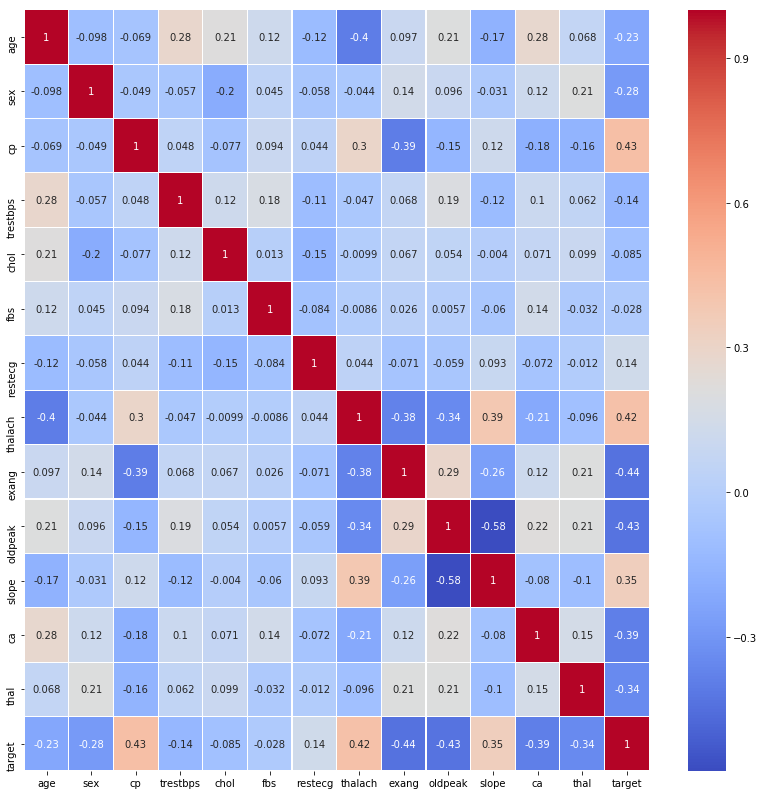

In [12]:
plt.figure(figsize=(14,14))
sns.heatmap(df.corr(), annot = True, linewidth = 0.1, cmap='coolwarm')

In [13]:
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

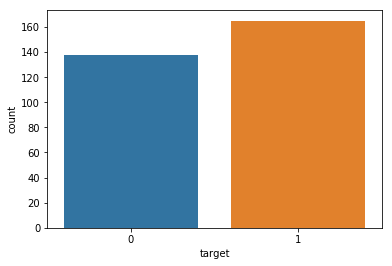

In [14]:
sns.countplot(x="target",data=df)

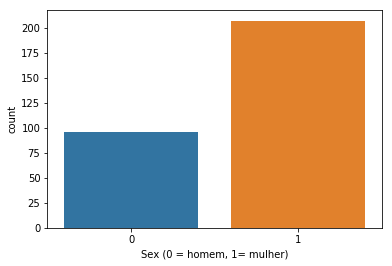

In [15]:
sns.countplot(x='sex', data=df)
plt.xlabel("Sex (0 = homem, 1= mulher)")
plt.show()

Text(0.5, 0, 'Age')

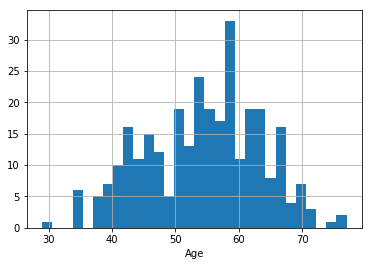

In [16]:
df['age'].hist(bins=30)
plt.xlabel('Age')

Text(0.5, 1.0, 'Age distribution')

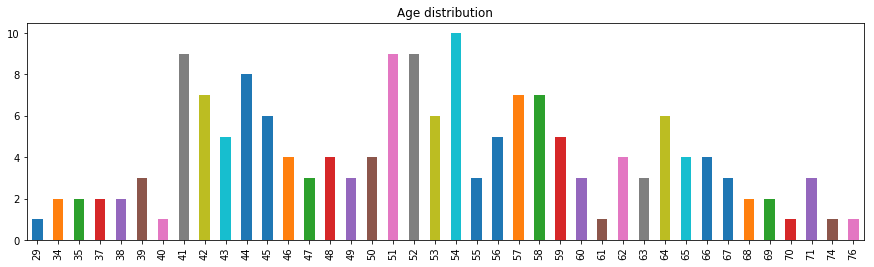

In [17]:
plot = df[df.target == 1].age.value_counts().sort_index().plot(kind="bar", figsize=(15,4))
plot.set_title("Age distribution")

Text(0.5, 1.0, 'Age distribution')

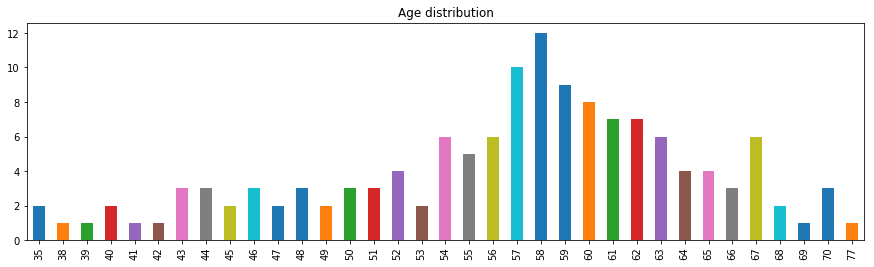

In [18]:
plot = df[df.target == 0].age.value_counts().sort_index().plot(kind="bar", figsize=(15,4))
plot.set_title("Age distribution")

In [19]:
df.cp.value_counts()

0    143
2     87
1     50
3     23
Name: cp, dtype: int64

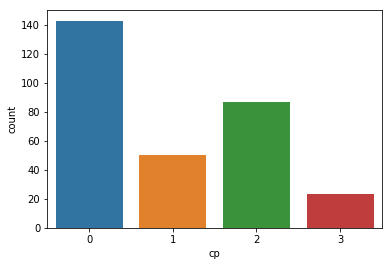

In [20]:
sns.countplot(x="cp",data=df)

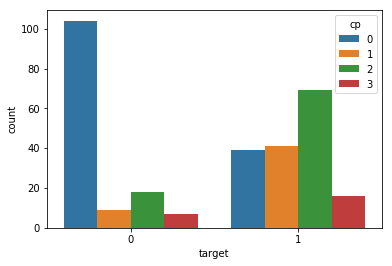

In [21]:
sns.countplot(x='target',hue='cp',data=df)

Text(0, 0.5, 'tem a doença ou nao')

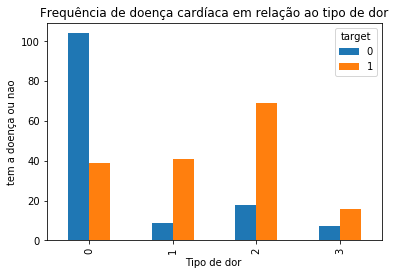

In [22]:
pd.crosstab(df.cp, df.target).plot(kind='bar')
plt.title("Frequência de doença cardíaca em relação ao tipo de dor")
plt.xlabel("Tipo de dor ")
plt.ylabel("tem a doença ou nao")

# construindo um modelo de Regressão Logística****

In [23]:
from sklearn.model_selection import train_test_split

In [25]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('target',axis=1), df['target'], test_size=0.30, random_state=101)

# Treinamento e Previsão

In [27]:
from sklearn.linear_model import LogisticRegression

In [28]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

# Avaliação

In [29]:
predictions = logmodel.predict(X_test)

In [30]:
from sklearn.metrics import classification_report

In [31]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.95      0.80      0.86        44
           1       0.83      0.96      0.89        47

   micro avg       0.88      0.88      0.88        91
   macro avg       0.89      0.88      0.88        91
weighted avg       0.89      0.88      0.88        91

